# IEEE-CIS Fraud Detection

## Integrating machine learning to detect fraud

Industries and individuals are suffering from fraudulent damages. As noted from [SearchSecurity.com](https://searchsecurity.techtarget.com/definition/fraud-detection), fraud can be define as money or property being obtained through false pretenses. Implementing effective and accurate fraud prevention systems can save businesses and consumers millions of dollars. With the goal of improving customer experience, [IEEE Computational Intelligence Society](https://cis.ieee.org/) has partnered with payment service company, [Vesta Corporation](https://trustvesta.com/), to find more effective solutions for fraud prevention. 

In this project, we will be participating in this competition and using Kaggle's competition [IEEE-CIS Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection) machine dataset. The purpose of the competition is to use historical Vesta's real-world e-commerce transaction to predict whether a transaction is fraud or not. We will employ supervised classification models for this task. 
 * __Supervised__: The goal is to train a model to learn from features to predict the probability of an online fraudulent transaction given labels in the _isFraud_ column. 
 * __Classification__: The label is a binary variable: 0 (not fraud), 1 (fraud)
 
### Overview of Data
There are a total of 5 files: 
 * 1 example submission files 
 * 2 transaction files (test and train)
 * 2 identity files (test and train) 

Since the transaction files include our target variable _isFraud_ column, we will predominately be exploring transaction files. This will let us establish a baseline that we can then improve upon. 


## Metric ROC AUC

Before we begin, let's get an understanding of how each submission is evaluated. For this competition, models are being judged by the Receiver Operating Characteristic Area Under the Curve (ROC AUC), which measures the true positive rate versus the false positive rate. 

ROC AUC measures the probability between 0 and 1. While a score of 0.5 indicates random guessing, better models will receive a higher score. Setting accuracy as the metric isn't recommend since real-world datasets have imbalanced classes. The model will likely be good in predicting the dominant class and misclassify the minority class. In this project, we can anticipate that most transactions are not fraud. If we were to measure based on accuracy, our model would preform well in detecting non-fraud related transactions. That wouldn't be the most effective way in preventing fraud if our model is not good at identifying it. Thus, ROC AUC is used to reflect the accuracy of a classifier.

# Read in Data



In [1]:
# Numpy and pandas
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistics tools
import scipy.stats as stats

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Model prep and Modeling 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
import pydotplus
import graphviz

# Random Forests 
from sklearn import ensemble

# SVM
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Evaluate
from sklearn import metrics
from sklearn.metrics import log_loss,accuracy_score, f1_score,roc_auc_score, confusion_matrix

# Import data
from sqlalchemy import create_engine
import warnings

In [2]:
# List files available
raw_test = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/ieee-fraud-detection/test_transaction.csv')

raw_train = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/ieee-fraud-detection/train_transaction.csv')


In [3]:
# List files available
test_iden = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/ieee-fraud-detection/test_identity.csv')
test_trans = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/ieee-fraud-detection/test_transaction.csv')
train_iden = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/ieee-fraud-detection/train_identity.csv')
train_trans = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/ieee-fraud-detection/train_transaction.csv')


In [5]:
# Training data
print('Training transaction data shape: ', train_trans.shape)
train_trans.head()

Training transaction data shape:  (590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The training data has 590,540 observations (each one a separate online transaction) and 394 attributes including the target variable we want to predict.

In [6]:
print('Testing transaction data shape: ', test_trans.shape)
test_trans.head()

Testing transaction data shape:  (506691, 393)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The testing data contains 506,691 observations and 393 attributes. This dataset is smaller than the training set and does not contain the target variable. 

#### Merging training sets
The transaction training file lacks identity information on each transaction, so we will merge the training identity and transaction files on TransactionID. Since each observation has a unique transaction ID, we will do a 1 to 1 join.

Below, we can see that the row length for train transaction and identity are not equal. It was noted that Vesta was unable to obtain all identity information so we will continue with the merge table for now.

In [7]:
print('Number of row in transaction:', len(train_trans))
print('Number of row in identity:', len(train_iden))

Number of row in transaction: 590540
Number of row in identity: 144233


In [8]:
# Train data 
raw_train = pd.merge(train_iden, train_trans, on = 'TransactionID')

In [9]:
# Copy dataset for feature selection 
test = raw_test.copy()
train = raw_train.copy()

In [10]:
print('Number of unique transaction ID:', train['TransactionID'].nunique())
print('Number of unique transaction ID:', test['TransactionID'].nunique())

Number of unique transaction ID: 144233
Number of unique transaction ID: 506691


# Exploratory Data Analysis 
Exploratory Data Analysis (EDA) is an iterative process to explore the data and summarize characteristics by calculating statistics or visualize methods. The purpose of EDA is gain an understanding of the data by identifying trends, anomalies, or relationships that might be helpful when making decisions in the modeling process. 

### Examine the Distribution of the Target Column

We will begin EDA by exploring individual variables, particularly our target variable, _isFraud_. The target is what we are asked to predict: either a 0 for non-fraud transactions, or a 1 for fraud transaction. First, let's examine the number of transactions falling into each category.

In [11]:
train['isFraud'].value_counts()

0    132915
1     11318
Name: isFraud, dtype: int64

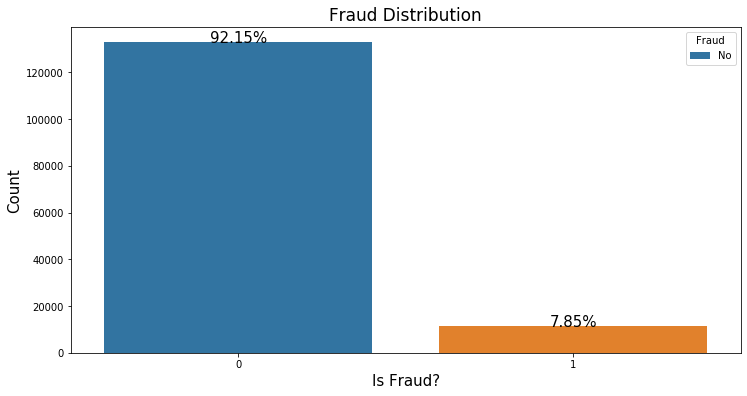

In [12]:
# Plot target variable
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'isFraud', data = train)
g.set_title("Fraud Distribution", fontsize = 17)
g.set_xlabel("Is Fraud?", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
plt.legend(title='Fraud', labels=['No', 'Yes'])

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train) * 100),
            ha="center", fontsize=15) 

The fraud rate is 3.50% in the transaction dataset. We can see an imbalanced class problem from the value count and histogram. We may consider mitigating this issue by sampling based approaches. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

### Missing Values
Now, we will take a look at missing values in each column. Due to the volume of the data, we will look at different sections of the data.

In [13]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
missing_values_table(train)

Your selected dataframe has 434 columns.
There are 412 columns that have missing values.


,Missing Values,% of Total Values
V11,144233,100.0
M9,144233,100.0
D11,144233,100.0
V8,144233,100.0
V7,144233,100.0
V6,144233,100.0
V5,144233,100.0
V4,144233,100.0
V9,144233,100.0
V2,144233,100.0


We can observe that there are missing values in majority of the columns. There appears to be a pattern of missing values in columns V122-V163. Due to  the limited information given on these columns for privacy issues, it is difficult to determine if these columns offer helpful information for predicting fraud.

We may impute these missing values later or use models that can handle missing values.

### Column Types
In this section, we will take a look at the numbers of columns of each data type. 

In [15]:
# Number of each type of column
train.dtypes.value_counts()

float64    399
object      31
int64        4
dtype: int64

Let's now look at the number of unique entries in each of the object (categorical) columns.

In [16]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

id_12               2
id_15               3
id_16               2
id_23               3
id_27               2
id_28               2
id_29               2
id_30              75
id_31             130
id_33             260
id_34               4
id_35               2
id_36               2
id_37               2
id_38               2
DeviceType          2
DeviceInfo       1786
ProductCD           4
card4               4
card6               3
P_emaildomain      59
R_emaildomain      60
M1                  0
M2                  0
M3                  0
M4                  3
M5                  0
M6                  0
M7                  0
M8                  0
M9                  0
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. We will encode these attributes.

### Anomalies 
We'll be searching for anomalies within the data.  These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method. 


In [17]:
# Statistics 
train.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,0.777733,723.339755,1379.108414,1017.190218,9.837929,59.213495,28.592672,55.461163,151.546395,100.950114
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,4.735065,6222.466950,11181.344838,7964.623789,244.320100,388.035252,275.048519,669.707372,1096.739466,816.354359
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.000000,55125.000000,104060.000000,104060.000000,104060.000000


Inital observations:
 - Transaction amount varies from /$0.25 to /$31,937
 - Not sure why card 1,2,3,5 are numeric
 - A lot of V columns are 0 

In [18]:
# Categorical Statistics 
train.describe(include=['object'])

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,...,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,...,131083,0,0,0,60831,0,0,0,0,0
unique,2,3,2,3,2,2,2,75,130,260,...,60,0,0,0,3,0,0,0,0,0
top,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,...,gmail.com,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
freq,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,...,55079,NaN,NaN,NaN,50300,NaN,NaN,NaN,NaN,NaN


Inital observations:

- Product code W is the most popular item
- People pay with mostly debit visa
- Gmail is the most popular email domain
- M4 is not similar to other M columns

It is difficult to detect an anomaly from the statistics table. Let's explore the interaction between features and our target variable to see if we can find something interesting. 

## Multivariable Analysis
Now, let's explore how our target variable interacts with other features. 


### Correlation 
To determine which explanatory variables we might select for our prediction model, we will explore the correlation between _isFraud_ and other variables. Correlation refers to a mutal association between variables. Variables that have a strong correlation, whether it being positive or negative, will affect the target variable.


In [19]:
# Find correlations with the target and sort
corr = train.corr()['isFraud'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(15))
print('\nMost Negative Correlations:\n', corr.head(15))

Most Positive Correlations:
 V30    NaN
V35    NaN
V36    NaN
V48    NaN
V49    NaN
V53    NaN
V54    NaN
V69    NaN
V70    NaN
V75    NaN
V76    NaN
V90    NaN
V91    NaN
V107   NaN
V305   NaN
Name: isFraud, dtype: float64

Most Negative Correlations:
 D5      -0.147260
D8      -0.142636
D7      -0.129077
id_01   -0.120099
D2      -0.102215
id_07   -0.084768
D10     -0.072737
V150    -0.064043
D15     -0.063428
V159    -0.062742
V160    -0.062408
V145    -0.062063
D6      -0.061721
V151    -0.060958
id_04   -0.059701
Name: isFraud, dtype: float64


Based on the correlation list, our target variable is not highly correlated to many variables so we will examine the features by categories. 


_Categorical Features_
 * ProductCD: product code
 * card4, card6: card information 
 * P_emaildomain: purchaser email domain
 * R_emaildomain: recipient email domain
 * M1 - M9: match (names on card, address, etc)
 
_Numeric Features_
 * TransactionDT: timedelta from a given reference datetime
 * TransactionAMT: transaction payment amount in USD
 * card1-3, card5: card information 
 * dist: distance
 * addr1, addr2: address 
 * C1-C4: counting
 * D1-D15: timedelta (time between previous transaction)
 * V1-V339: Vesta engineered features


 
### Categorical Variables 
We'll start with exploring categorical variables. 

In [20]:
# Function to visualize categorical variables
def visualize_cat_var(variable, df=train):
    df[variable].fillna("NA", inplace=True)
    # If normalize is True then the object returned will contain the relative frequencies of the unique values.
    variable_fraud_rate = df.groupby(variable)['isFraud'].value_counts(normalize = True).unstack().fillna(0)[1]
    
    plt.figure(figsize=(12,6))

    g = sns.countplot(x = variable, data = train, order = variable_fraud_rate.index)
    g.set_title('{} Count'.format(variable), fontsize = 15)
    g.set_xlabel("{}".format(variable), fontsize=15)
    g.set_ylabel("Count", fontsize=15)
    plt.xticks(rotation= "vertical")

    r = g.twinx()
    r = sns.pointplot(x = variable_fraud_rate.index, y = variable_fraud_rate, color = "blue")
    r.set_ylabel("Fraud Rate", fontsize = 16, color = "blue")

### Product CD
Product code represent the product for each transaction.<br>

“Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”

__Which Product C has the highest fraud rate?__

In [21]:
train[train['isFraud'] == 1]['ProductCD'].value_counts(normalize = True)

C    0.675031
H    0.138805
R    0.125729
S    0.060435
Name: ProductCD, dtype: float64

In [22]:
# Group by Product CD 
train.groupby('ProductCD')['isFraud'].value_counts(normalize = True)

ProductCD  isFraud
C          0          0.877155
           1          0.122845
H          0          0.952261
           1          0.047739
R          0          0.962102
           1          0.037898
S          0          0.940958
           1          0.059042
Name: isFraud, dtype: float64

C is the most fequent product category. In terms of the fraud rate per product code, product C also has the highest count of fraud. 

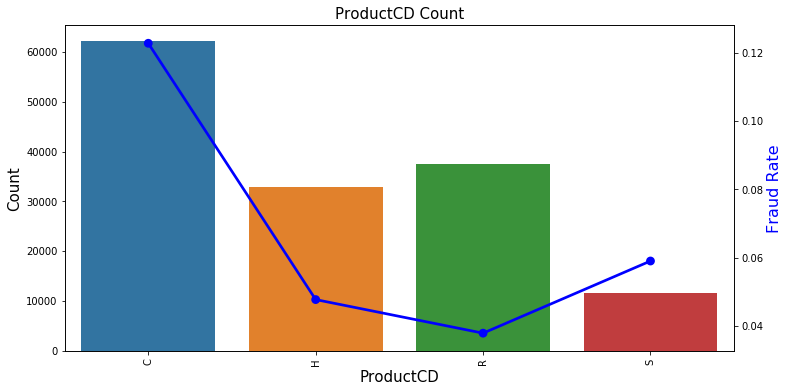

In [23]:
# Plot Product CD Distribution
visualize_cat_var('ProductCD')

Majority of fraud transactions occur among Product C purchases, making up 67% of fraud transcations. However, when we compare the relative frequencies of the unique values, Product C fraud rate reduces to 12%,but is still higher than other product category.

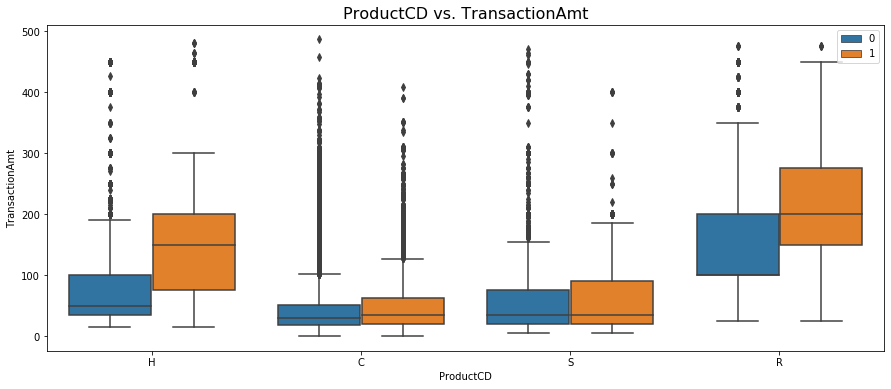

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(x="ProductCD", y="TransactionAmt", hue="isFraud",
                   data=train.query('TransactionAmt < 500'),
                   ax=ax).set_title('ProductCD vs. TransactionAmt', fontsize=16)
plt.legend(loc='upper right')
plt.show()

From the boxplot, we can see that fraud tends to occur among higher priced items. 

### Card Type
These columns represent payment card information, such as card type, card category, issue bank, country, etc.

Card 1, 2, 3, and 5 are numeric variables in this dataset. However, the numeric values are probably represent categories.

__Which card has the highest fraud rate?__

In [25]:
card_cols = [c for c in train.columns if 'card' in c]
train[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,4497,514.0,150.0,mastercard,102.0,credit
1,2803,100.0,150.0,visa,226.0,debit
2,16496,352.0,117.0,mastercard,134.0,credit
3,4461,375.0,185.0,mastercard,224.0,debit
4,1790,555.0,150.0,visa,226.0,debit


In [26]:
train.loc[:,'card1':'card6'].nunique()

card1    8499
card2     482
card3     103
card4       4
card5     106
card6       3
dtype: int64

From looking at the head of the table, card 4 contains information of card network. Card 6 describes the type of payment. 

Card 1, 2, 3, and 5 are harder to interpet. Card 1 contains 13,553 unique values which may have been some form of card ID. Card 2, 3, and 4 could be other card information such as expiration date. 

__Card 4__


In [27]:
train[train['isFraud'] == 1]['card4'].value_counts(normalize = True)

visa                0.616419
mastercard          0.346780
american express    0.021143
discover            0.015658
Name: card4, dtype: float64

Visa accounts for 61% of all fraud occurences. It probably is the most popular card type.

In [28]:
train.groupby('card4')['isFraud'].value_counts(normalize = True)

card4             isFraud
american express  0          0.971198
                  1          0.028802
discover          0          0.921889
                  1          0.078111
mastercard        0          0.911284
                  1          0.088716
visa              0          0.921970
                  1          0.078030
Name: isFraud, dtype: float64

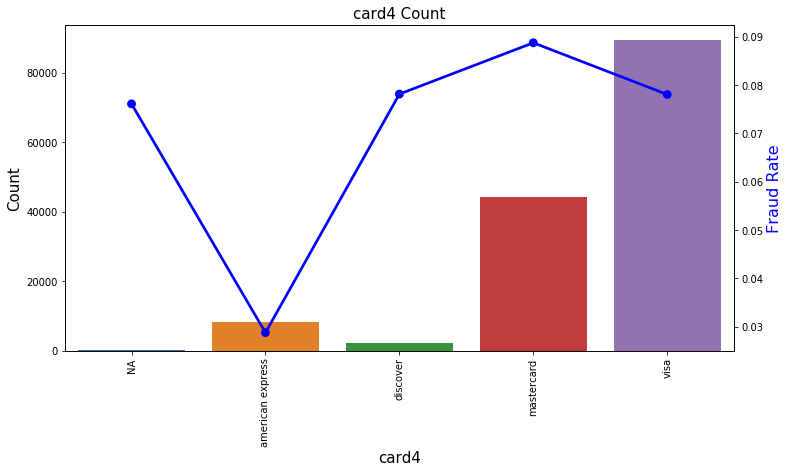

In [29]:
# Plot Card 4
visualize_cat_var('card4')

 When normalized by total number of each type, Mastercar cards has the highest fraud rate: 8.8%.
 
 __Card 6__

In [30]:
train[train['isFraud'] == 1]['card6'].value_counts(normalize = True)

credit    0.591987
debit     0.408013
Name: card6, dtype: float64

In [31]:
train.groupby('card6')['isFraud'].value_counts(normalize = True)

card6        isFraud
charge card  0          1.000000
credit       0          0.910867
             1          0.089133
debit        0          0.933096
             1          0.066904
Name: isFraud, dtype: float64

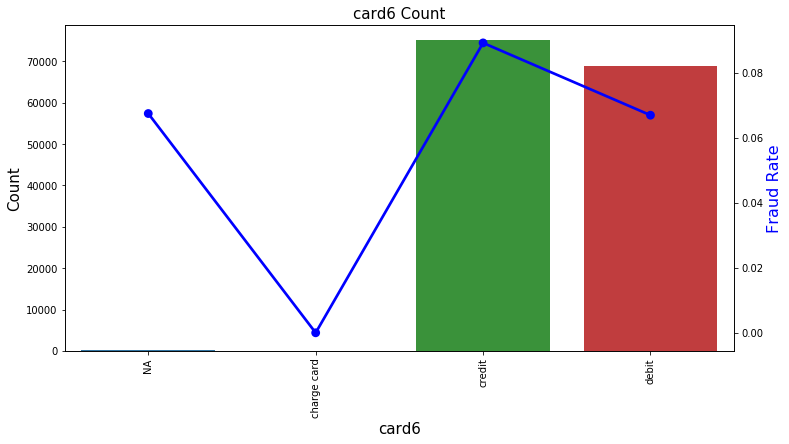

In [32]:
# Card 6
visualize_cat_var('card6')

Fraud rate for credit cards are much higher (8.9%) than  debit cards (6.6%).

### Email Domain
P_ and (R_) emaildomain: purchaser and recipient email domain “ certain transactions don't need recipient, so R_emaildomain is null.”

__Which email domain has the highest fraud rate?__

__Purcahser Email Domain__

In [33]:
email_fraud = train[train['isFraud'] == 1]['P_emaildomain'].value_counts(normalize = True)
email_fraud.head()

gmail.com        0.604963
hotmail.com      0.197084
anonymous.com    0.059000
yahoo.com        0.046929
outlook.com      0.040460
Name: P_emaildomain, dtype: float64

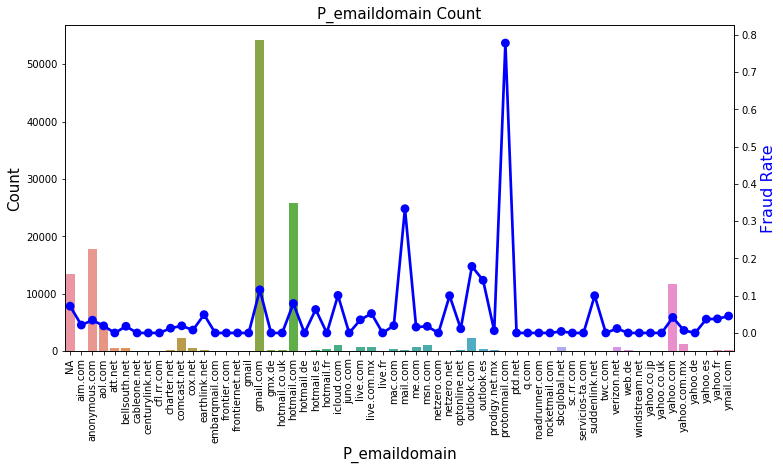

In [34]:
# Plot purchaser email domain
visualize_cat_var('P_emaildomain')

The most popular email domains are gmail.com, yahoo.com, and hotmail.com. They also have the highest occurance of fraud. 

In terms of fraud rate, almost 80% of transactions from purchaser using protonmail.com were label fraud.

__Reciever Email Domain__

In [35]:
email_fraud = train[train['isFraud'] == 1]['R_emaildomain'].value_counts(normalize = True)
email_fraud.head()

gmail.com        0.608855
hotmail.com      0.187489
yahoo.com        0.055025
anonymous.com    0.053096
outlook.com      0.037387
Name: R_emaildomain, dtype: float64

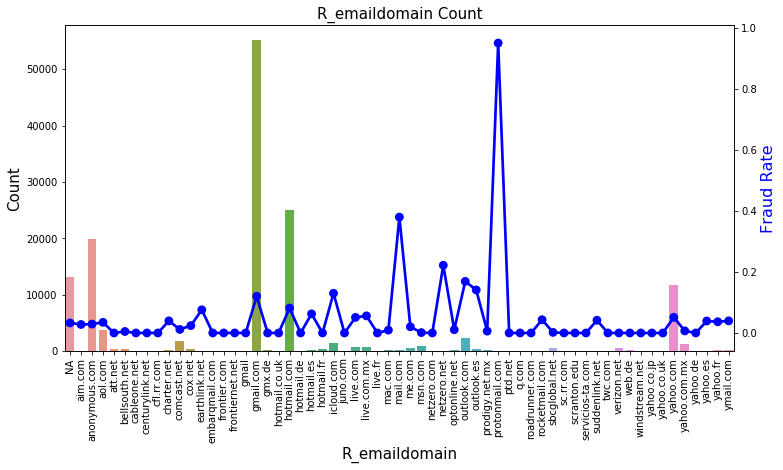

In [36]:
# Plot reciever email domain
visualize_cat_var('R_emaildomain')

Similar to purchaser email domain, protonmail recieved the most fraud rate.

### M1-M9
M columns represent matches such as names on card and address, etc.

In [37]:
m_cols = [c for c in train.columns if c[0] == 'M']
train[m_cols].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
train.loc[:,'M1':'M9'].nunique()

M1    0
M2    0
M3    0
M4    3
M5    0
M6    0
M7    0
M8    0
M9    0
dtype: int64

It looks like most M columns are binary variables with a T and F representing True and False match respectively. Let's take  a closer look at M4 since there are 3 unique values. 

__M4__

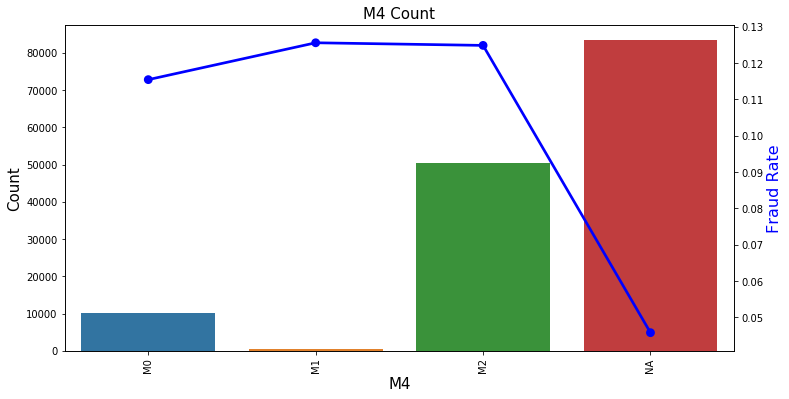

In [39]:
visualize_cat_var('M4')

It looks like M4 contains the match count for M0, M1, and M2. There isn't much information on what each M column represent, but M2 appears to have the highest fraud rate, which is over 10%. 

## Numerical Features
Now, we will continue EDA by exploring the interaction between our target variable and numerical variables. 

In [40]:
def visualize_trans_var(variable, df=train):
    plt.figure(figsize=(12,18))
    plt.suptitle('Distribution of: {}'.format(variable), fontsize=22)
    
    plt.subplot(3,2,1)
    sns.distplot(df[variable], kde= False)
    plt.title('{} Distribution'.format(variable), fontsize = 15)

    plt.subplot(3,2,2)
    sns.distplot(np.log10(df[variable]), kde= False)
    plt.title('Log-transformed Distribution', fontsize = 15)


    plt.subplot(3,2,3)
    sns.distplot(df[df['isFraud'] == 0][variable], color = 'skyblue', kde= False, label = 'Not Fraud')
    sns.distplot(df[df['isFraud'] == 1][variable], color = 'red', kde= False , label = 'Fraud')
    plt.title('Fraud vs Non-Fraud Distribution', fontsize = 15)
    plt.legend()

    plt.subplot(3,2,4)
    sns.distplot(np.log10(df[df['isFraud'] == 0][variable]), color = 'skyblue', kde= False, label = 'Not Fraud')
    sns.distplot(np.log10(df[df['isFraud'] == 1][variable]), color = 'red', kde= False , label = 'Fraud')
    plt.title('Log-transformed Distribution', fontsize = 15)
    plt.legend()


In [41]:
# Function to visualize numeric variables
def visualize_num_var(variable, df=train):
    # check for homogeneity:
    if len(df[variable].unique()) <= 1:
        print('{} is a homogeneous set'.format(variable))
        return
    
    # check for NAs and Zeros
    if df[variable].isnull().values.any():
        df = train.dropna(subset=[variable])

    if df[variable].min() < 0:
        plt.figure(figsize=(12,12))
        plt.suptitle('Distribution of: {}'.format(variable), fontsize=22)
    
        plt.subplot(2,2,1)
        sns.distplot(df[variable], kde= False)
        plt.title('{} Distribution'.format(variable), fontsize = 15)
        
        plt.subplot(2,2,2)
        sns.distplot(df[df['isFraud'] == 0][variable], color = 'skyblue', kde= False, label = 'Not Fraud')
        sns.distplot(df[df['isFraud'] == 1][variable], color = 'red', kde= False , label = 'Fraud')
        plt.title('Fraud vs Non-Fraud Distribution', fontsize = 15)
        plt.legend()
        
    else:
        smallest_value = df[df[variable] != 0][variable].min()
            
        if df[variable].min() == 0:
            df[variable].replace(0, smallest_value/10, inplace=True)       

        plt.figure(figsize=(12,18))
        plt.text(x=0.5, y=0.5,
                 s="Zeros have been replaced with {} to avoid log infinity".format(smallest_value/10),
                 fontsize=12,horizontalalignment='center')

        plt.suptitle('Distribution of: {}'.format(variable), fontsize=22)

        plt.subplot(3,2,1)
        sns.distplot(df[variable], kde= False)
        plt.title('{} Distribution'.format(variable), fontsize = 15)

        plt.subplot(3,2,2)
        sns.distplot(np.log10(df[variable]), kde= False)
        plt.title('Log-transformed Distribution', fontsize = 15)
        
        plt.subplot(3,2,3)
        sns.distplot(df[df['isFraud'] == 0][variable], color = 'skyblue', kde= False, label = 'Not Fraud')
        sns.distplot(df[df['isFraud'] == 1][variable], color = 'red', kde= False , label = 'Fraud')
        plt.title('Fraud vs Non-Fraud Distribution', fontsize = 15)
        plt.legend()

        plt.subplot(3,2,4)
        sns.distplot(np.log10(df[df['isFraud'] == 0][variable]), color = 'skyblue', kde= False, label = 'Not Fraud')
        sns.distplot(np.log10(df[df['isFraud'] == 1][variable]), color = 'red', kde= False , label = 'Fraud')
        plt.title('Log-transformed Distribution', fontsize = 15)
        plt.legend()


### TransactionDT
This column is defined as time delta from a given reference datetime (not an actual timestamp). 

Lynn@Vesta commented in one of the discussion post:

_"We define reported chargeback on card, user account, associated email address and transactions directly linked to these attributes as fraud transaction (isFraud=1); If none of above is found after 120 days, then we define as legit (isFraud=0)"_

In [42]:
train['TransactionDT'].head()

0    86506
1    86535
2    86549
3    86555
4    86620
Name: TransactionDT, dtype: int64

Text(0.5, 1.0, 'Distribution of TransactionDT')

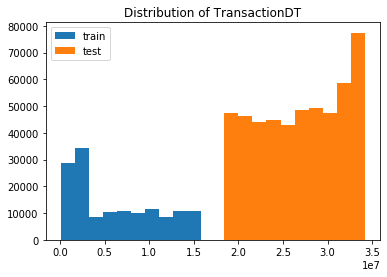

In [43]:
# Plot distribution of Transaction delta time
plt.hist(train['TransactionDT'], label='train')
plt.hist(test['TransactionDT'], label='test')
plt.legend()
plt.title('Distribution of TransactionDT')

The plot suggests there to be a time gap between the training and testing dataset. Currently, the time measurement for this column has not been determined. 

Some have suggested the following:

_“TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.”_

### Transaction Amount
This is the transaction payment amount in USD. <br>


“Some of the transaction amounts have three decimal places to the right of the decimal point. There seems to be a link to three decimal places and a blank addr1 and addr2 field. Is it possible that these are foreign transactions and that, for example, the 75.887 in row 12 is the result of multiplying a foreign currency amount by an exchange rate?”

Let's take the log to treat the right skew of the transaction distribution. 

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


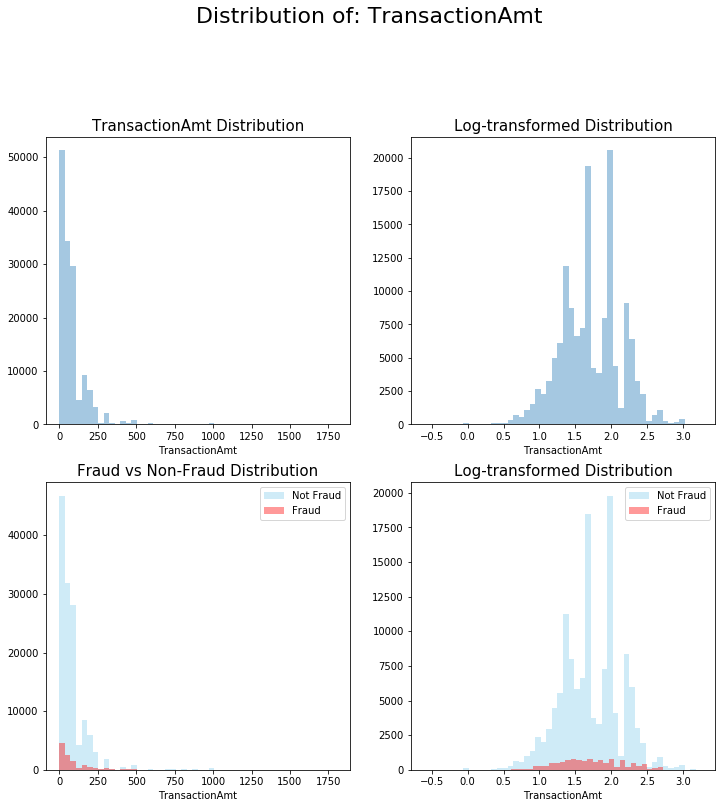

In [44]:
visualize_trans_var('TransactionAmt')

After taking the log of the transaction amount, we can see see that most fraud occur among lower priced items.

### Distance 1 and 2
This can be interpeted as distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.

In [45]:
visualize_num_var('dist1')

dist1 is a homogeneous set


/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


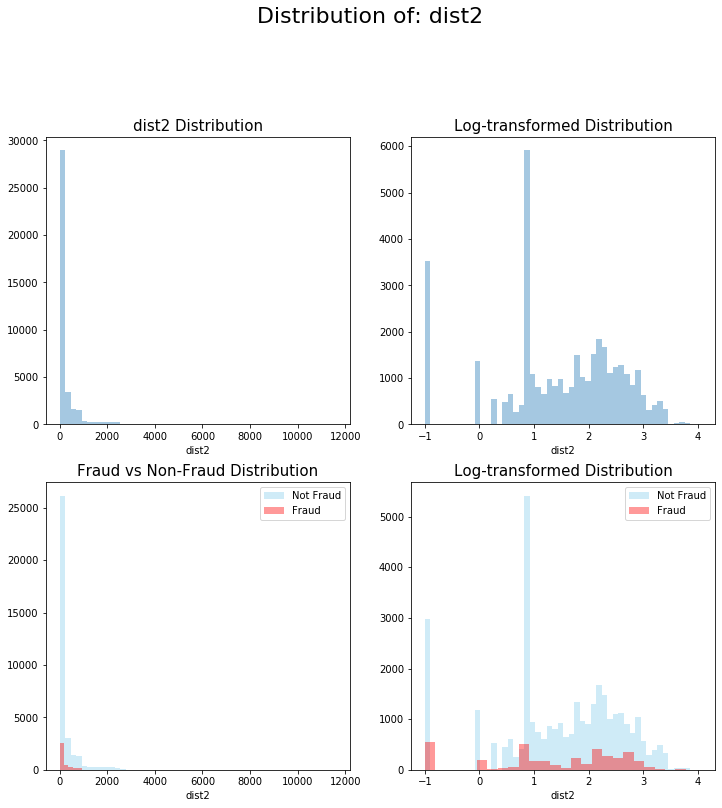

In [46]:
visualize_num_var('dist2')

Both the distance distribution is highly right skewed.

### Address 
The address columns refer to the purchaser information. _Addr1_ is the billing region and _addr2_ is the billing country.

In [47]:
print(' addr1 - has {} NA values'.format(train['addr1'].isna().sum()))
print(' addr2 - has {} NA values'.format(train['addr2'].isna().sum()))

 addr1 - has 60447 NA values
 addr2 - has 60447 NA values


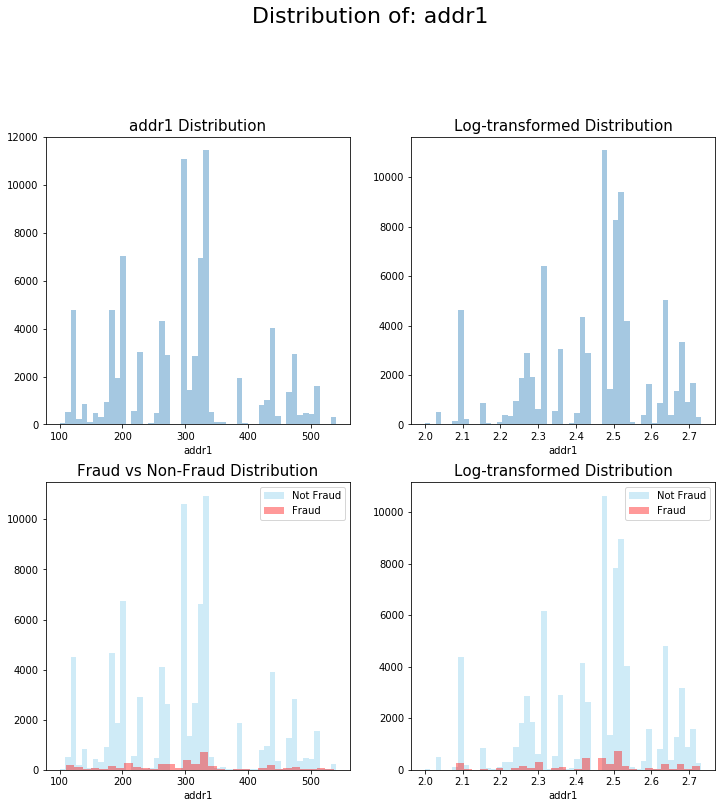

In [48]:
visualize_num_var('addr1')

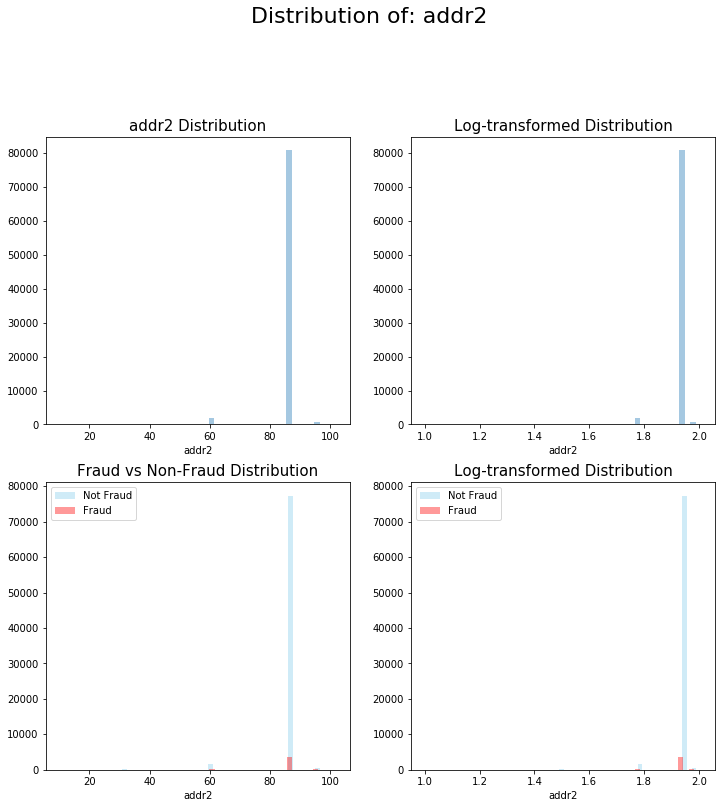

In [49]:
visualize_num_var('addr2')

There appears to be many missing address for the second column. 

### C1 - C14
C columns are counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

In [50]:
c_cols = [c for c in train if c[0] == 'C']
train[c_cols].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [51]:
train.loc[:,'C1':'C14'].nunique()

C1     1559
C2     1182
C3       27
C4     1202
C5        1
C6     1194
C7     1036
C8     1236
C9        1
C10    1211
C11    1354
C12    1126
C13    1362
C14     994
dtype: int64

Let's check out C3 since there are only 27 unique values. 

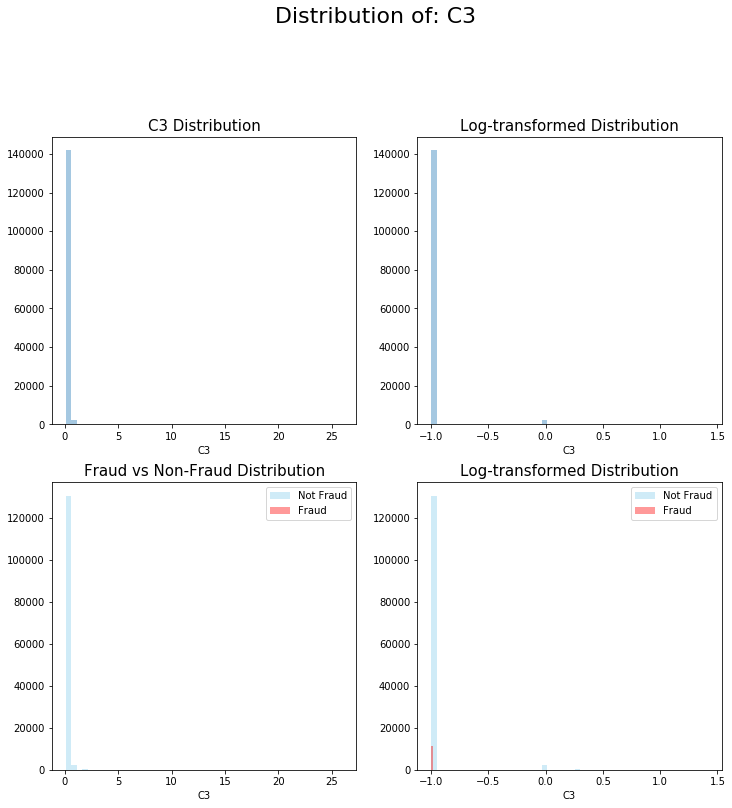

In [52]:
visualize_num_var('C3')

Well, these graphs aren't helpful.

### D1-D9
D columns are timedelta, such as days between previous transaction, etc.

In [53]:
d_cols = [c for c in train if c[0] == 'D']
train[d_cols].head()

,DeviceType,DeviceInfo,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,mobile,SAMSUNG SM-G892A Build/NRD90M,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mobile,iOS Device,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,desktop,Windows,1.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
3,desktop,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
4,desktop,MacOS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
train.loc[:,'D1':'D9'].nunique()

D1      641
D2      641
D3      543
D4      791
D5      619
D6      828
D7      595
D8    12353
D9       24
dtype: int64

Let's check out D2, D7, and D8 since these attributes are most negatively correlated to _isFraud_.

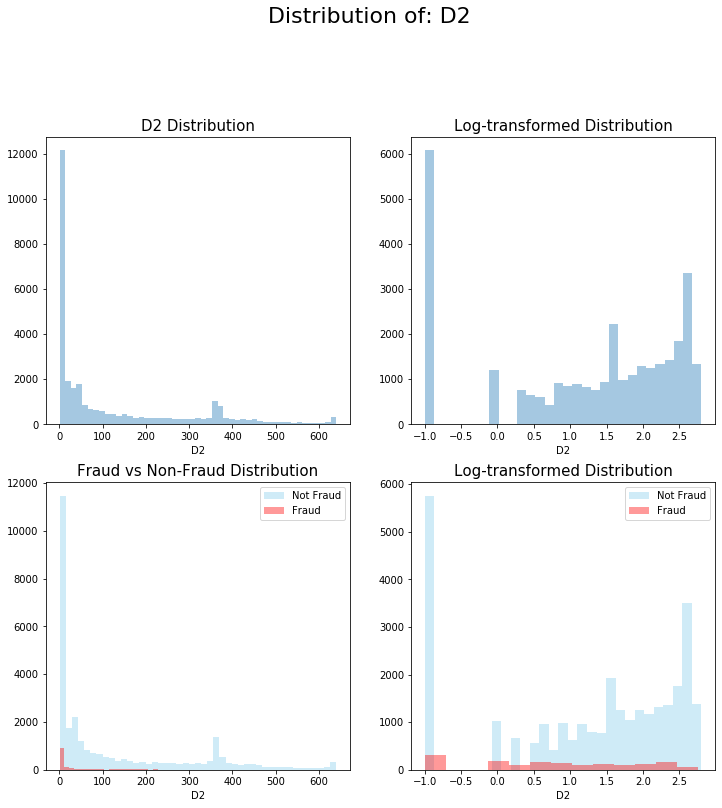

In [55]:
visualize_num_var('D2')

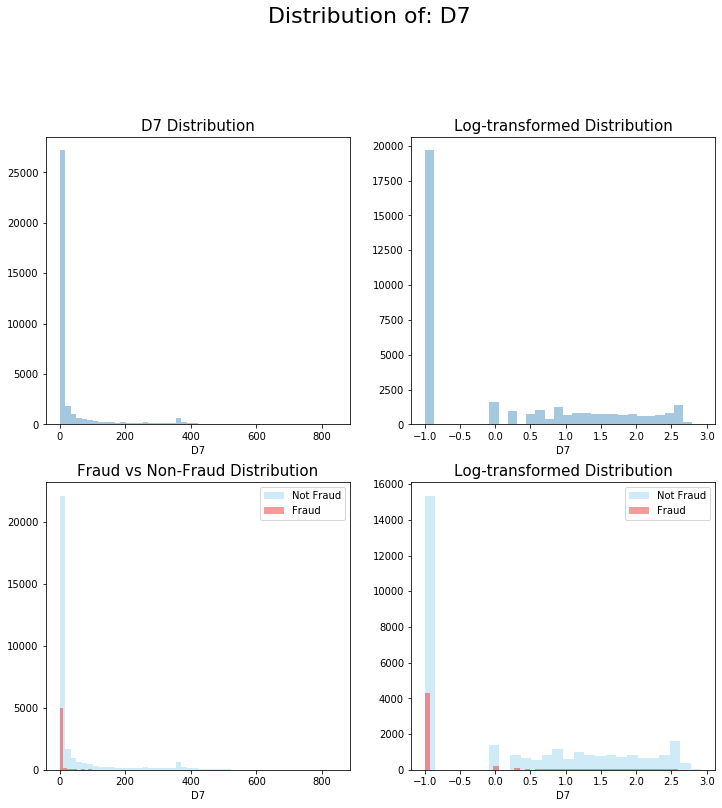

In [56]:
visualize_num_var('D7')

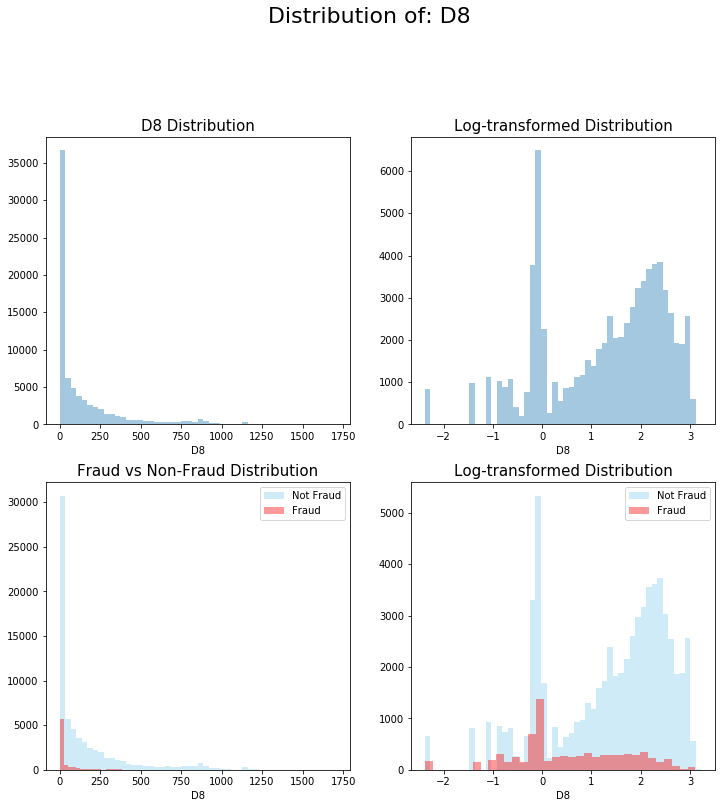

In [57]:
visualize_num_var('D8')

### V1-V339
These are Vesta engineered rich features, including ranking, counting, and other entity relations.

“For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.”

"All Vesta features were derived as numerical. Some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying."

In [58]:
v_cols = [c for c in train if c[0] == 'V']
train[v_cols].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
train[v_cols].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.777733,723.339755,1379.108414,1017.190218,9.837929,59.213495,28.592672,55.461163,151.546395,100.950114
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.735065,6222.466950,11181.344838,7964.623789,244.320100,388.035252,275.048519,669.707372,1096.739466,816.354359
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.000000,55125.000000,104060.000000,104060.000000,104060.000000


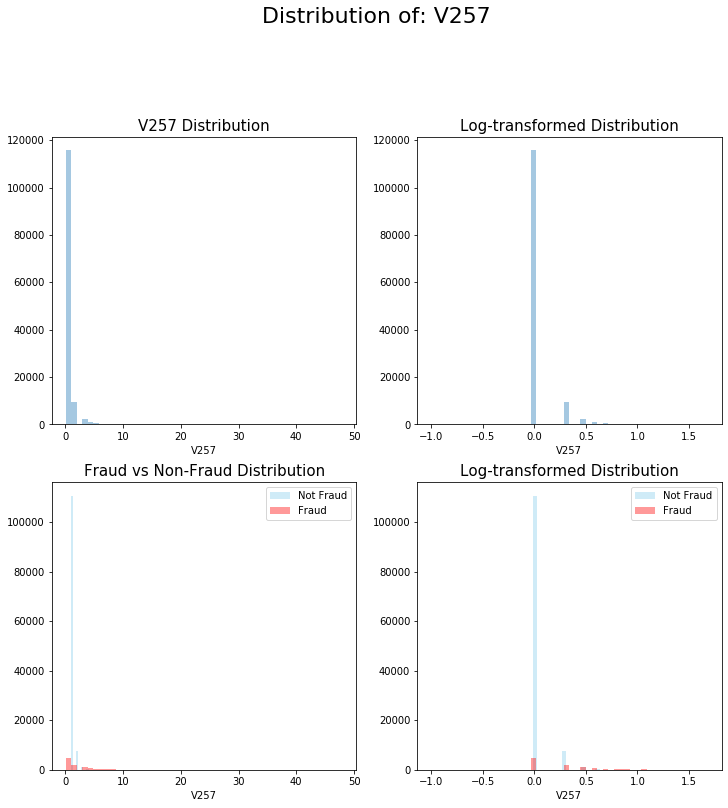

In [60]:
visualize_num_var('V257')

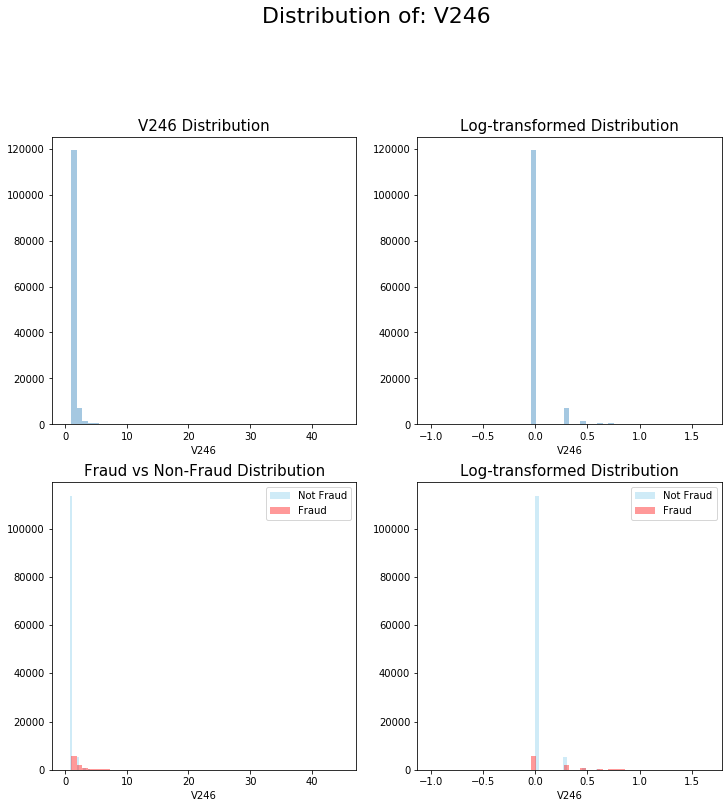

In [61]:
visualize_num_var('V246')

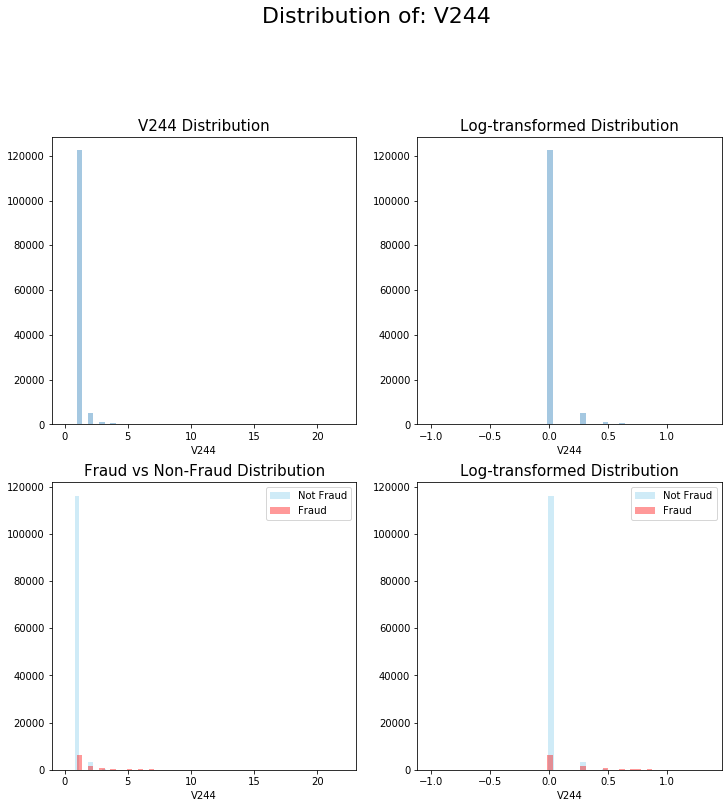

In [62]:
visualize_num_var('V244')

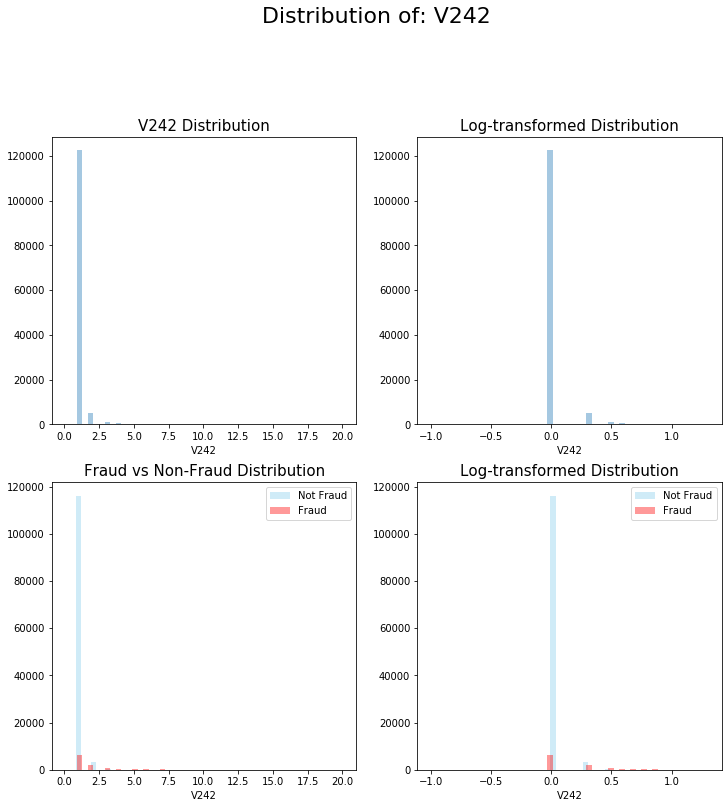

In [63]:
visualize_num_var('V242')

Interesting that there are negative components of the mean of V columns.

## EDA Observations 

To recap:

- There is an imbalance class problem where the occurance of fraud only accounts for 3.5% of the dataset.

- Majority of the columns contain numerous missing values.

- Several columns are related to each other, however, the information is masked which makes understanding each column more difficult.

- Product W has the most instances of fraud, while Product C has the highest fraud rate among product category

- Visa card accounts for the highest frequency of fraud, while Discovery card has the highest fraud rate among card network category.

- Although debit cards are the most popular form of payment, fraud rate for credit cards are much higher (6.6%) than amoung debit cards (2.4%).

# Feature Selection and Engineering 

Since we have identified trends and relationship within the dataset, we will out findings to select a set of features for our model. 

### Encoding Categorical Variables
Before we continue, most machine learning models cannot handle categorical variables well. Therefore, we will have to encode (represent) these variables as numbers before modeling. The two main encoding methods are: 
 * __Label encoding__: assign each unique category in a categorical variable with an integer. No new columns are created.
 * __One-hot encoding__: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.
 
The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. 

For this project, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. 

In [64]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtypes == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

KeyError: 'id_12'

In [65]:
# One-hot encoding of categorical variables
raw_train = pd.get_dummies(raw_train)
raw_test = pd.get_dummies(raw_test)

print('Training Features shape: ', raw_train.shape)
print('Testing Features shape: ', raw_test.shape)

Training Features shape:  (144233, 2817)
Testing Features shape:  (506691, 530)


In [66]:
# One-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (144233, 2821)
Testing Features shape:  (506691, 530)


### Engineer New Features 

#### Log Transformations
Since transaction amount if highly right skewed, we will take the log of this variable. 

In [67]:
# New feature - log of transaction amount
train['TransactionAmt_Log'] = np.log(train['TransactionAmt'])
test['TransactionAmt_Log'] = np.log(test['TransactionAmt'])

#### Time Features
We can incorporate the Transaction delta time by interepting the data as seconds. This will allow us to create day of the week which the transaction occured. 

In [68]:
# New feature - day of week in which a transaction 
train['Transaction_day_of_week'] = np.floor((train['TransactionDT'] / (3600 * 24) - 1) % 7)
test['Transaction_day_of_week'] = np.floor((test['TransactionDT'] / (3600 * 24) - 1) % 7)

In [69]:
# New feature - hour of the day in which a transaction happened.
train['Transaction_hour'] = np.floor(train['TransactionDT'] / 3600) % 24
test['Transaction_hour'] = np.floor(test['TransactionDT'] / 3600) % 24

#### Card Features
Here we will be creating new card variables by adding _Transaction Amount_, mean, and standard deviation of each card. 

In [70]:
i_cols = ['card1','card2','card3','card5']

for col in i_cols:
    for agg_type in ['mean','std']:
        new_col_name = col+'_TransactionAmt_'+agg_type
        temp_df = pd.concat([train[[col, 'TransactionAmt']], test[[col,'TransactionAmt']]])
        #temp_df['TransactionAmt'] = temp_df['TransactionAmt'].astype(int)
        temp_df = temp_df.groupby([col])['TransactionAmt'].agg([agg_type]).reset_index().rename(
                                                columns={agg_type: new_col_name})

        temp_df.index = list(temp_df[col])
        temp_df = temp_df[new_col_name].to_dict()   

        train[new_col_name] = train[col].map(temp_df)
        test[new_col_name]  = test[col].map(temp_df)

#### Email Domains
We will be combining email domains of purchaser and reciever into bins. 

### Aligning Training and Testing Data
There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. 

In [ ]:
## CURRENTLY SKIPPPED THIS STEP
train_labels = train['isFraud']

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['isFraud'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

In [ ]:
# Get missing columns in the training test
missing_cols = set( train.columns ) - set( test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test[train.columns]

The training and testing datasets now have the same features which is required for machine learning. The number of features has grown significantly due to one-hot encoding. At some point we will try dimensionality reduction. 

## Split Train and  Test set 
Let's split dataset by using function train_test_split(). Here, the Dataset is broken into two parts in a ratio of 80:20. It means 80% data will be used for model training and 20% for model testing.


To continue feature selection, we will start by using the original attributes in the raw training set. 

In [71]:
# Split dataset in features and target variable
X = raw_train.drop(columns=['TransactionID','TransactionDT','isFraud',]).fillna(-999)
y = raw_train['isFraud']


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [74]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_test.shape)

X_shapes:
 X_train: X_validation:
 (115386, 2814) (28847, 2814) 

Y_shapes:
 Y_train: Y_validation:
 (115386,) (28847,)


# Baseline 
For a naive baseline, logistic regression to predict the probability of occurrence of fraud by utilizing a logit function. 

## Logistic Regression 
Here, we first create the model and train the model using .fit.  Then, we make predictions on the testing data using .predict_proba (remember that we want probabilities and not a 0 or 1).

In [75]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

#
y_pred=logreg.predict(X_test)

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


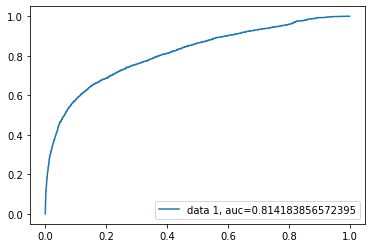

In [76]:
# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The logistic regression basline scored around 0.81. This model is slightly better than using only transaction dataset which scored 0.78.

## Improved Model: Random Forest
Let's try using a Random Forest on the same training data to see if it will beat the performance of our baseline. The Random Forest is a much more powerful model especially when we use hundreds of trees. We will use 100 trees in the random forest.

In [77]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

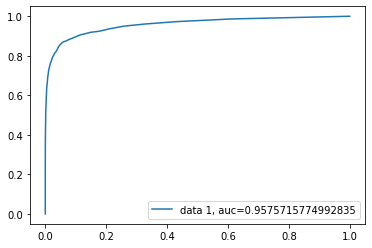

In [78]:
# ROC Curve
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

This model score is around 0.957 which is 0.02 better than only using transaction dataset. This is also a drastic improvement from our baseline model. 

### Finding Important Features
As a simple method to see which variables are the most relevant, we can look at the feature importances of the random forest. We may use these feature importances as a method of dimensionality reduction in future work.

In [79]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


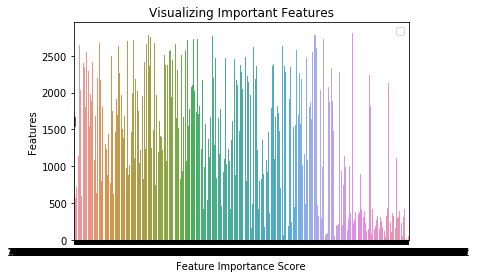

In [80]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Well, this graph isn't helpful. How can I fix this? Maybe I'll try turning it into a list and return only the most top features. 

### Make Predictions using Engineered Features
Now, let's see if our engineered features will improve our model by training the model of these features. 

__Spliting data with engineered features__

In [81]:
# Split dataset in features and target variable
X2 = train.drop(columns=['TransactionID','TransactionDT','isFraud',]).fillna(-999)
y2 = train['isFraud']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [83]:
X2_train = X_train.values
X2_test = X_test.values
y2_train = y_train.values
y2_test = y_test.values

In [84]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X2_train.shape, X2_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y2_train.shape, y2_test.shape)

X_shapes:
 X_train: X_validation:
 (115386, 2829) (28847, 2829) 

Y_shapes:
 Y_train: Y_validation:
 (115386,) (28847,)


__Testing Engineered Features___

In [85]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X2_train,y2_train)

y2_pred=clf.predict(X2_test)

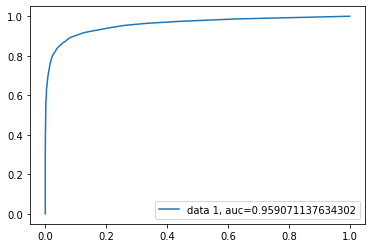

In [86]:
# ROC Curve
y2_pred_proba = clf.predict_proba(X2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_proba)
auc = metrics.roc_auc_score(y2_test, y2_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

With our engineered features, this model scored 0.959. This is a 0.002 improvment from using the original dataset. These features weren't that helpful and we should consider engineering new features.

## Model Selection 
Now that we have decided to continue on with our feature selection, we will test our data on the following models: 
- logistic regression 
- linear discriminant analysis
- KNN classifer
- Decision Tree Classifer
- SVM
- XGB Classifer
- Random Forest Classifer

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver

LR: 0.826863 (0.014453)


/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [ ]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X2_train, y2_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X2.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Conclusion 
We followed the general outline of a machine learning project:

1. Understand the problem and the data
2. Data cleaning and formatting (this was mostly done for us)
3. Exploratory Data Analysis
4. Baseline model
5. Improved model
6. Model interpretation (just a little)